In [3]:
from pandas import read_csv
import pandas as pd

In [5]:
data = pd.read_csv("general_data.csv")
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [6]:
target = "Attrition"

In [9]:
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

In [12]:
objects = feature_by_dtype["object"]
remove = ["Over18"]

In [13]:
categorical_features = [f for f in objects if f not in remove]

In [14]:
int64s = feature_by_dtype["int64"]

In [15]:
remove.append("StandardHours")
remove.append("EmployeeCount")

In [16]:
count_features = []
for i in [i for i in int64s if len(data[i].unique()) < 10 and i not in remove]:
    count_features.append(i)

In [17]:
data[count_features].head()

,Education,JobLevel,StockOptionLevel,TrainingTimesLastYear
0,2,1,0,6
1,1,1,1,3
2,4,4,3,2
3,5,3,3,5
4,1,1,2,2


In [18]:
data[categorical_features].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married
1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single
2,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married
3,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married
4,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single


### Chi-square 2 Way

In [20]:

from scipy.stats import chi2_contingency
from pandas import crosstab, DataFrame

p_value_table = DataFrame(index = [target], columns = (categorical_features+count_features))

for c in (categorical_features+count_features):

    crosstable = crosstab(data[c], data[target])
    chi2, p, dof, expected = chi2_contingency(crosstable)
    p_value_table[c][target] = p

p_value_table = p_value_table.T
p_value_table["p < 0.05"] = p_value_table.apply(lambda x : x < 0.05)

In [21]:
p_value_table.sort_values("Attrition", ascending=False)

,Attrition,p < 0.05
StockOptionLevel,0.384547,False
Gender,0.245295,False
Education,0.227598,False
JobLevel,0.179928,False
JobRole,0.00148554,True
TrainingTimesLastYear,0.000907006,True
Department,4.82089e-07,True
EducationField,8.28892e-09,True
BusinessTravel,1.76428e-16,True
MaritalStatus,8.45386e-31,True


Attrition's Non-Significant Categorical Relationships

In [22]:
ns = p_value_table[p_value_table["p < 0.05"] == False].index.tolist()
print(ns)

['Gender', 'Education', 'JobLevel', 'StockOptionLevel']


Attrition's Statistically Significant Categorical Relationships

In [23]:
significant = p_value_table[p_value_table["p < 0.05"] == True].index.tolist()
print(significant)


['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'TrainingTimesLastYear']


### Count Plots

In [85]:
def percentages(data,category, filter_):
    output = {}
    total_count = data[filter_][category].value_counts().sum()
    for subclass in data[filter_][category].unique():
        subclass_count = data[filter_][category].value_counts()[subclass]
        output[subclass] = (subclass_count / total_count) * 100
    return output

from IPython.display import display
from pandas import DataFrame, options

def display_percentages(data,category, filter_):
    perc = percentages(data,category, filter_)
    df = DataFrame(perc, index=["Percent"]).T.sort_values("Percent", ascending=False)
    df["Cumulative Percent"] = [df["Percent"][0:i].sum() for i in range(1,len(df)+1)]
    options.display.float_format = '{:,.1f}%'.format
    print("Yes Only")
    print("Total Count: %s" % len(data[filter_]))
    display(df)
    
#====

from seaborn import countplot, despine, axes_style, set_style
from matplotlib.pyplot import show,figure,subplot,xticks,suptitle,title, ylabel, xlabel, margins
from numpy import mean

def display_categorical_x_categorical_analysis(data,category):

    set_style("whitegrid")
    
    set_style("whitegrid")

    with axes_style({'grid.color': "0.95", "lines.color" : "0.95"}):

        c = category

        order = data[data[target] == "Yes"][c].value_counts().sort_values(ascending=False).index

        fig = figure(figsize=(12,6))
        suptitle(c, fontsize=16)
        margins(0.8)
        subplot(121)
        title("Yes Only")
        cp = countplot(x=c, data=data[data[target] == "Yes"], order=order, color="#121831", linewidth=0)
        despine(left=True, top=True)

        xlabel_char_length = int(mean([len(str(i)) for i in data[c].unique()]))

        if(xlabel_char_length in range(7, 15)): 
            xticks(rotation=45)
        elif(xlabel_char_length > 14):
            xticks(rotation=90)

        subplot(122)
        title("Yes vs No")
        cp = countplot(x=c, hue=target, data=data, order=order, palette=["#121831", "#d4e2ed"], linewidth=0)
        despine(left=True, top=True)
        if(xlabel_char_length in range(7, 15)): 
            xticks(rotation=45)
        elif(xlabel_char_length > 14):
            xticks(rotation=90)
        xlabel(c)
        show()
        display_percentages(data,c,data[target] == "Yes")


In [71]:
i = iter(significant)

### Majority of employees lost in attrition rarely travel.

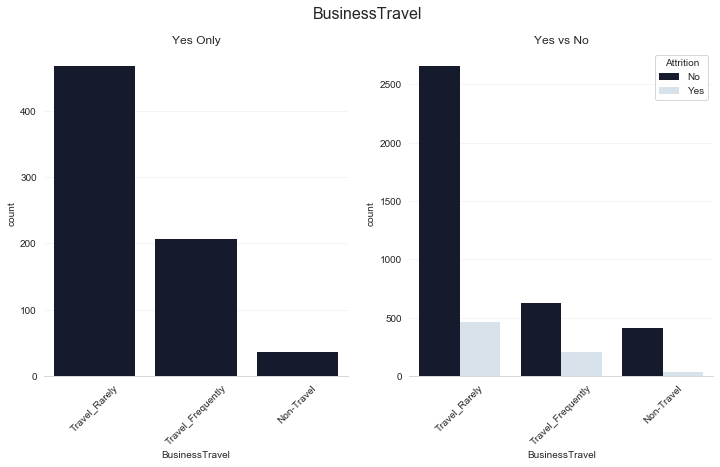

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Travel_Rarely,65.8%,65.8%
Travel_Frequently,29.1%,94.9%
Non-Travel,5.1%,100.0%


In [72]:
display_categorical_x_categorical_analysis(data,next(i))

### Research & Development and Sales department contribute 95% of the employees lost in attrition

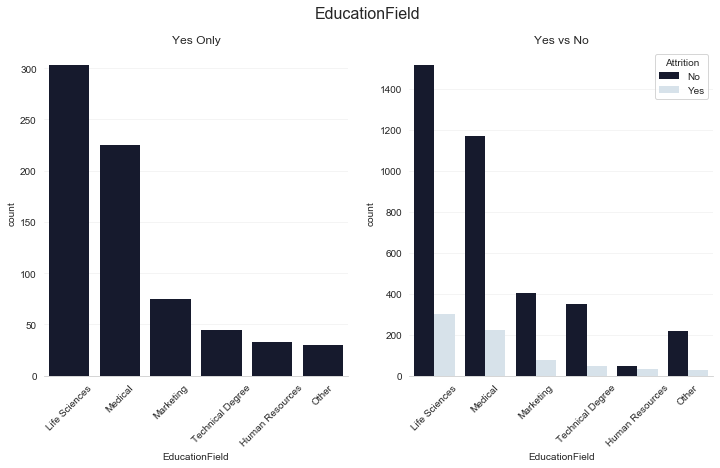

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Life Sciences,42.6%,42.6%
Medical,31.6%,74.3%
Marketing,10.5%,84.8%
Technical Degree,6.3%,91.1%
Human Resources,4.6%,95.8%
Other,4.2%,100.0%


In [46]:
display_categorical_x_categorical_analysis(data,next(i))

### Employees educated in life sciences or medical together make up 64% of the attrition sample.

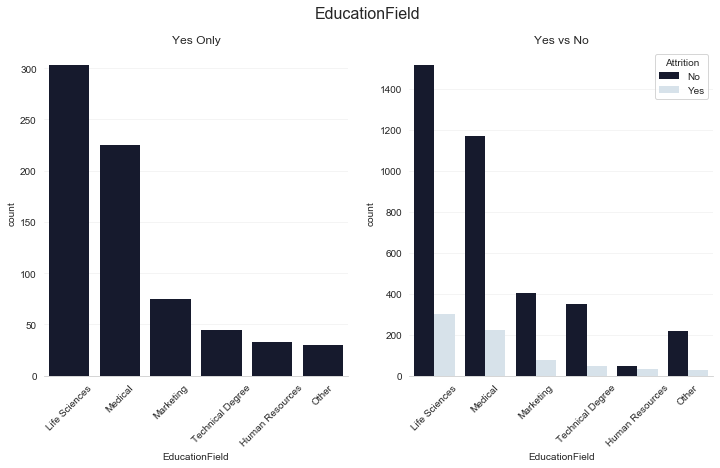

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Life Sciences,42.6%,42.6%
Medical,31.6%,74.3%
Marketing,10.5%,84.8%
Technical Degree,6.3%,91.1%
Human Resources,4.6%,95.8%
Other,4.2%,100.0%


In [30]:
display_categorical_x_categorical_analysis(data,next(i))

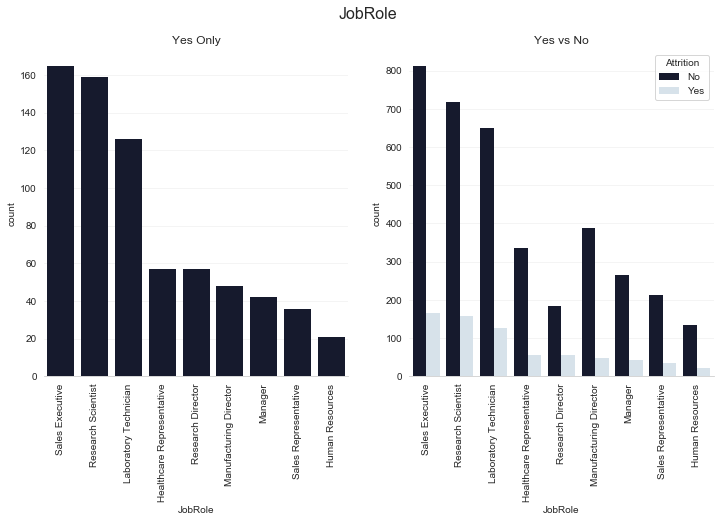

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Sales Executive,23.2%,23.2%
Research Scientist,22.4%,45.6%
Laboratory Technician,17.7%,63.3%
Healthcare Representative,8.0%,71.3%
Research Director,8.0%,79.3%
Manufacturing Director,6.8%,86.1%
Manager,5.9%,92.0%
Sales Representative,5.1%,97.0%
Human Resources,3.0%,100.0%


In [31]:
display_categorical_x_categorical_analysis(data,next(i))

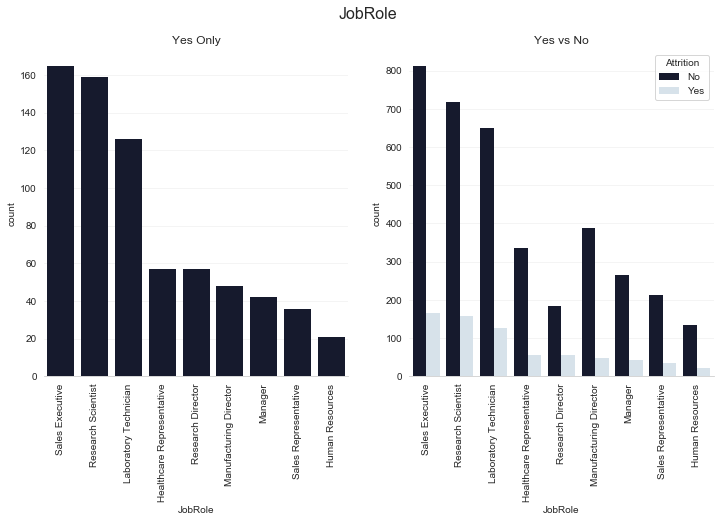

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Sales Executive,23.2%,23.2%
Research Scientist,22.4%,45.6%
Laboratory Technician,17.7%,63.3%
Healthcare Representative,8.0%,71.3%
Research Director,8.0%,79.3%
Manufacturing Director,6.8%,86.1%
Manager,5.9%,92.0%
Sales Representative,5.1%,97.0%
Human Resources,3.0%,100.0%


In [47]:
display_categorical_x_categorical_analysis(data,next(i))

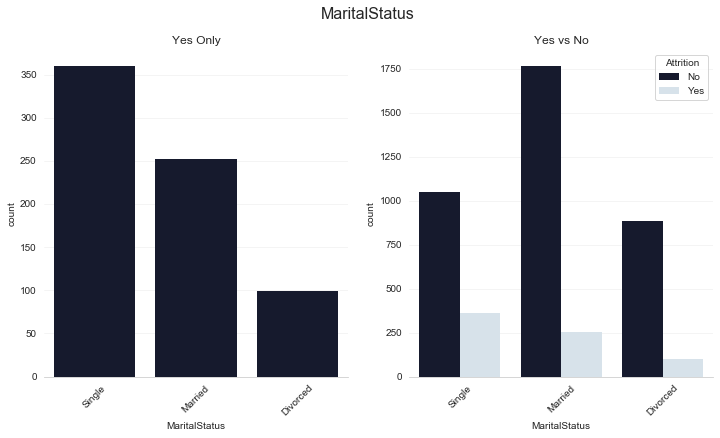

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Single,50.6%,50.6%
Married,35.4%,86.1%
Divorced,13.9%,100.0%


In [48]:
display_categorical_x_categorical_analysis(data,next(i))

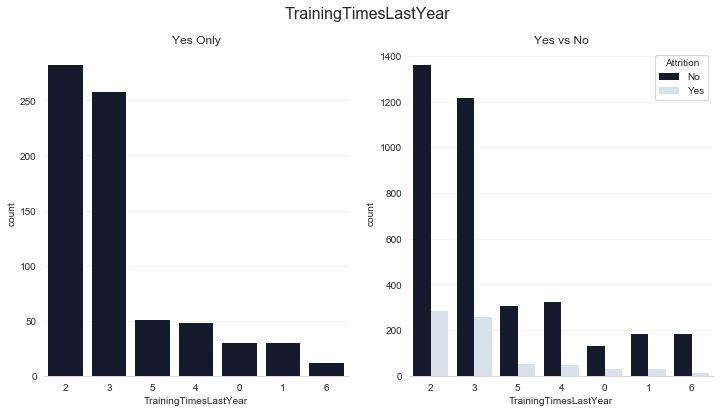

Yes Only
Total Count: 711


,Percent,Cumulative Percent
2,39.7%,39.7%
3,36.3%,75.9%
5,7.2%,83.1%
4,6.8%,89.9%
0,4.2%,94.1%
1,4.2%,98.3%
6,1.7%,100.0%


In [49]:
display_categorical_x_categorical_analysis(data,next(i))

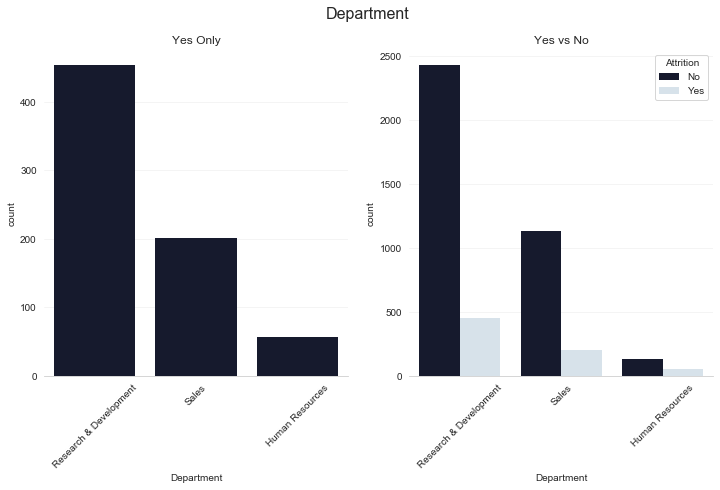

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Research & Development,63.7%,63.7%
Sales,28.3%,92.0%
Human Resources,8.0%,100.0%


In [73]:
display_categorical_x_categorical_analysis(data,next(i))

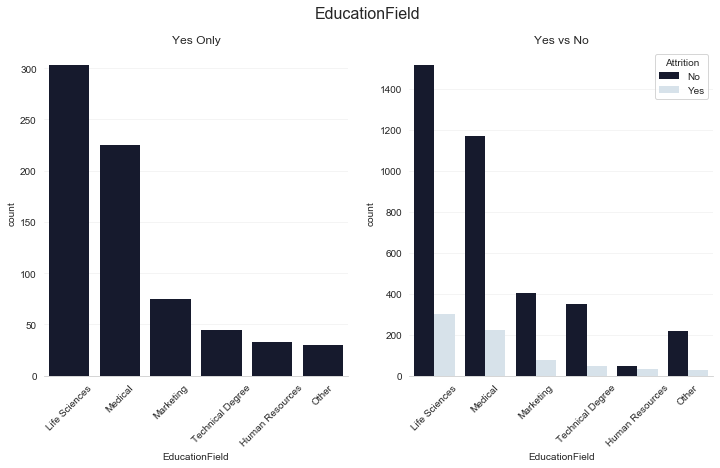

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Life Sciences,42.6%,42.6%
Medical,31.6%,74.3%
Marketing,10.5%,84.8%
Technical Degree,6.3%,91.1%
Human Resources,4.6%,95.8%
Other,4.2%,100.0%


In [74]:
display_categorical_x_categorical_analysis(data,next(i))

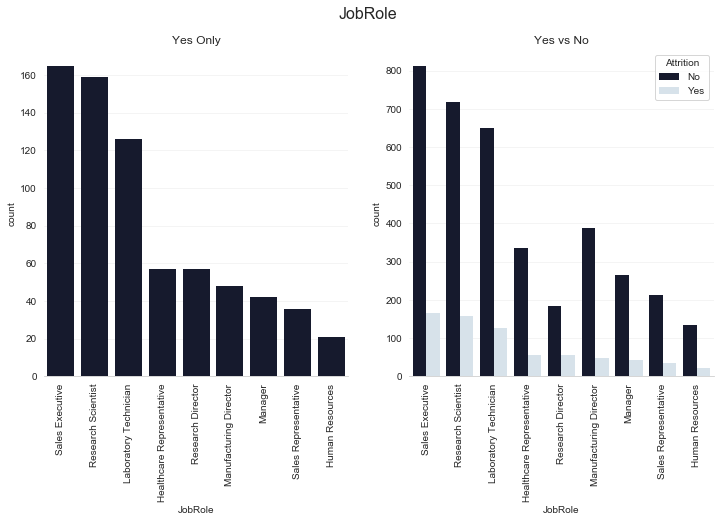

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Sales Executive,23.2%,23.2%
Research Scientist,22.4%,45.6%
Laboratory Technician,17.7%,63.3%
Healthcare Representative,8.0%,71.3%
Research Director,8.0%,79.3%
Manufacturing Director,6.8%,86.1%
Manager,5.9%,92.0%
Sales Representative,5.1%,97.0%
Human Resources,3.0%,100.0%


In [75]:
display_categorical_x_categorical_analysis(data,next(i))

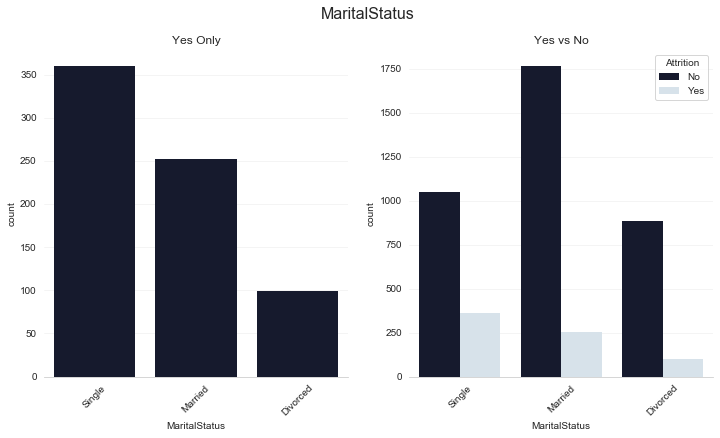

Yes Only
Total Count: 711


,Percent,Cumulative Percent
Single,50.6%,50.6%
Married,35.4%,86.1%
Divorced,13.9%,100.0%


In [76]:
display_categorical_x_categorical_analysis(data,next(i))

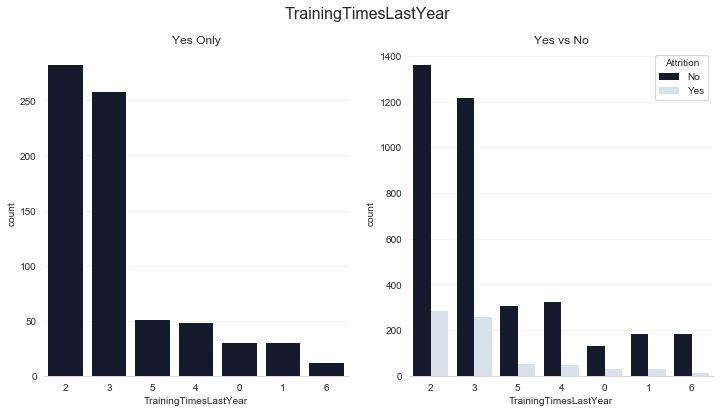

Yes Only
Total Count: 711


,Percent,Cumulative Percent
2,39.7%,39.7%
3,36.3%,75.9%
5,7.2%,83.1%
4,6.8%,89.9%
0,4.2%,94.1%
1,4.2%,98.3%
6,1.7%,100.0%


In [77]:
display_categorical_x_categorical_analysis(data,next(i))